In [5]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options



In [8]:
from selenium.common.exceptions import TimeoutException, WebDriverException

def scrape_flipkart_reviews(product_url, max_pages=50):
    options = Options()
    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--window-size=1920x1080")
    options.add_argument("--no-sandbox")
    options.add_argument("user-agent=Mozilla/5.0")

    driver = webdriver.Chrome(options=options)

    names, ratings, reviews = [], [], []

    for page in range(1, max_pages + 1):
        try:
            print(f"Scraping Page {page}")
            url = f"{product_url}&page={page}"
            driver.set_page_load_timeout(30)
            driver.get(url)
            time.sleep(2)

            soup = BeautifulSoup(driver.page_source, "html.parser")

            name_tags = soup.find_all("p", class_="_2NsDsF AwS1CA")
            rating_tags = soup.find_all("div", class_="XQDdHH Ga3i8K")
            review_tags = soup.find_all("div", class_="ZmyHeo")

            if not review_tags:
                break

            for name, rating, review in zip(name_tags, rating_tags, review_tags):
                review_text = review.text.strip().replace("READ MORE", "")
                if review_text not in reviews:
                    names.append(name.text.strip())
                    ratings.append(rating.text.strip())
                    reviews.append(review_text)

            if len(reviews) >= 500:
                break

        except (TimeoutException, WebDriverException) as e:
            print(f"⚠️ Timeout on Page {page}, skipping...")

    driver.quit()

    df = pd.DataFrame({
        "CUSTOMER NAME": [n.title() for n in names],
        "RATING": ratings,
        "REVIEW": reviews
    })

    return df

url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY"

df = scrape_flipkart_reviews(url)
print(f"✅ Scraped: {len(df)} reviews")
df.head()

        

     



Scraping Page 1
Scraping Page 2
Scraping Page 3
Scraping Page 4
Scraping Page 5
Scraping Page 6
Scraping Page 7
Scraping Page 8
Scraping Page 9
Scraping Page 10
Scraping Page 11
Scraping Page 12
Scraping Page 13
Scraping Page 14
Scraping Page 15
Scraping Page 16
Scraping Page 17
Scraping Page 18
Scraping Page 19
Scraping Page 20
Scraping Page 21
Scraping Page 22
Scraping Page 23
Scraping Page 24
Scraping Page 25
Scraping Page 26
Scraping Page 27
Scraping Page 28
Scraping Page 29
Scraping Page 30
Scraping Page 31
Scraping Page 32
Scraping Page 33
Scraping Page 34
Scraping Page 35
Scraping Page 36
Scraping Page 37
Scraping Page 38
Scraping Page 39
Scraping Page 40
Scraping Page 41
Scraping Page 42
⚠️ Timeout on Page 42, skipping...
Scraping Page 43
Scraping Page 44
Scraping Page 45
Scraping Page 46
Scraping Page 47
Scraping Page 48
Scraping Page 49
Scraping Page 50
✅ Scraped: 467 reviews


,CUSTOMER NAME,RATING,REVIEW
0,Rishabh Jha,5,Awesome 🔥🔥☺️
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Ajin V,5,High quality camera😍
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...
4,Mousam Guha Roy,4,Very nice


In [9]:
# Total reviews scraped
print(f"Total Reviews Collected: {len(df)}")


Total Reviews Collected: 467


In [10]:
# Show all reviews in the dataframe (CUSTOMER NAME, RATING, REVIEW)
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full review text

df[["CUSTOMER NAME", "RATING", "REVIEW"]]



,CUSTOMER NAME,RATING,REVIEW
0,Rishabh Jha,5,Awesome 🔥🔥☺️
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera with super fast processor
2,Ajin V,5,High quality camera😍
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned with camera performance. Everything is perfect on iPhone 15.
4,Mousam Guha Roy,4,Very nice
5,Flipkart Customer,5,Awesome photography experience. Battery backup is good . Display is much better than 14 version.
6,Prithivi Boruah,5,Camera Quality Is Improved Loving It
7,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️"
8,Arunji Govindaraju,5,"Awesome product very happy to hold this. Better In hand feel,matte finish. Good camera, Brighter screen with Dynamic Island, USB-C, great battery life.60Hz display is a dealbreaker for some.Its not much noticeable.Thank u Flipkart for the best deal and quick delivery."
9,Rahul Shedge,5,Totally happy!Camera 5Battery 5 Display 5Design 5


C:\Users\Govin\AppData\Local\Temp\ipykernel_19756\567089210.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="RATING", palette="Set2")


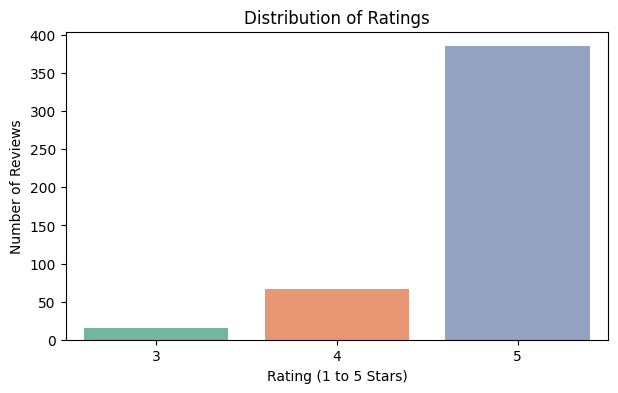

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert RATING to numeric type if not already
df["RATING"] = pd.to_numeric(df["RATING"], errors="coerce")

plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="RATING", palette="Set2")
plt.title("Distribution of Ratings")
plt.xlabel("Rating (1 to 5 Stars)")
plt.ylabel("Number of Reviews")
plt.show()


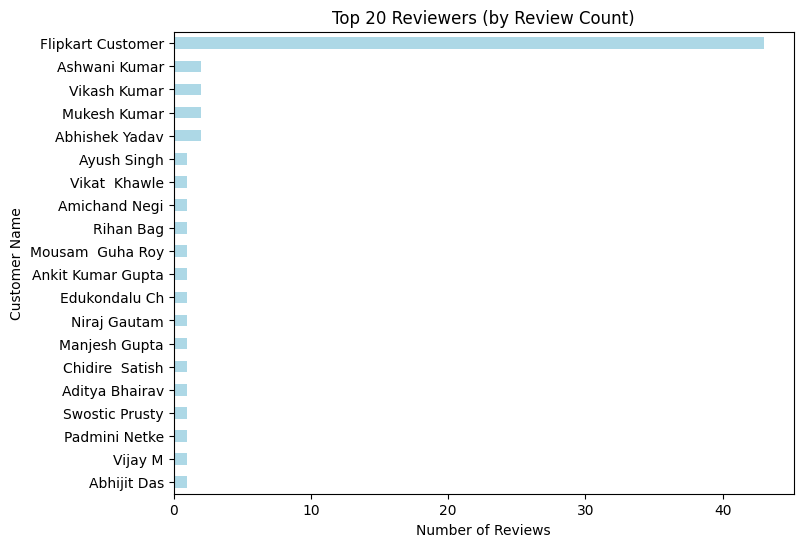

In [13]:
top_reviewers = df["CUSTOMER NAME"].value_counts().head(20)

plt.figure(figsize=(8, 6))
top_reviewers.plot(kind='barh', color='lightblue')
plt.gca().invert_yaxis()
plt.title("Top 20 Reviewers (by Review Count)")
plt.xlabel("Number of Reviews")
plt.ylabel("Customer Name")
plt.show()


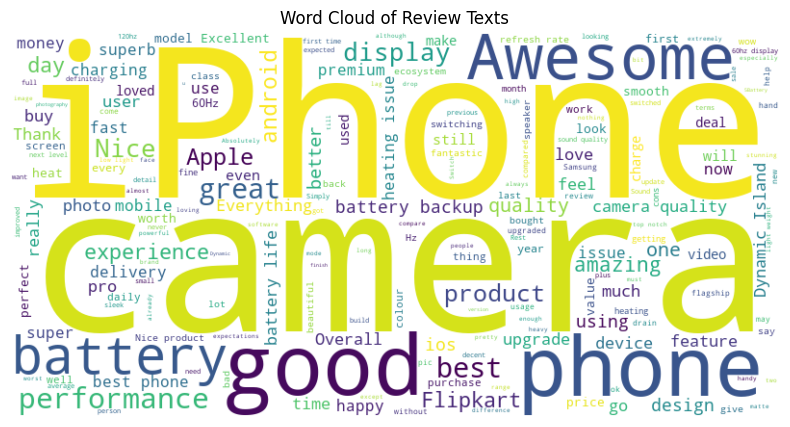

In [14]:
from wordcloud import WordCloud

# Combine all reviews into a single string
text = " ".join(review for review in df["REVIEW"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Review Texts")
plt.show()


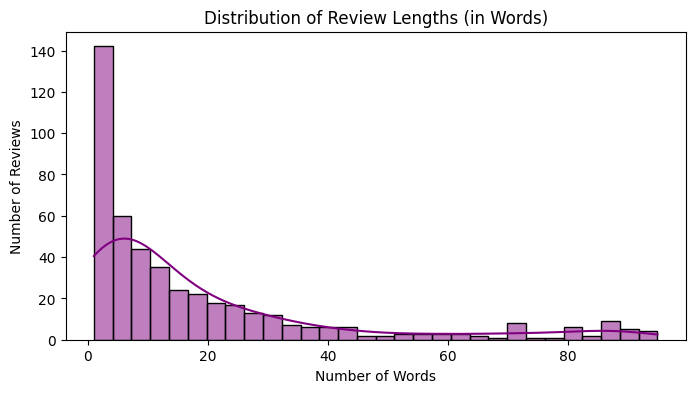

In [15]:
df["REVIEW_LENGTH"] = df["REVIEW"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 4))
sns.histplot(df["REVIEW_LENGTH"], bins=30, kde=True, color="purple")
plt.title("Distribution of Review Lengths (in Words)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()
